In [1]:
# Importamos las bibliotecas necesarias para el análisis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

In [2]:
# Cargamos el archivo CSV con los datos de las transacciones
data = pd.read_csv('Transacciones_de_ventas Practicas.csv')

In [3]:
# Visualizamos las primeras filas del dataset para entender la estructura de los datos
print(data.head())
print("Columnas del dataset:", data.columns)
# --- PREPROCESAMIENTO DE LOS DATOS ---
# Selección de columnas relevantes para el modelo
# Usamos 'Edad', 'Sector' como variables independientes y 'Tipo' como variable objetivo
columns_to_use = ['Edad', 'Sector', 'Tipo']
data_cleaned = data[columns_to_use]  # Filtramos las columnas seleccionadas
# Codificamos las variables categóricas (si las hubiera) a valores numéricos usando LabelEncoder
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    # Para cada columna categórica, convertimos las categorías en números
    label_encoders[column] = LabelEncoder()
    data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])

    Sector      Tipo     Linea    Sublinea Presentacion  Gramaje  \
0  BEBIDAS  TIPO OAX  DIVERSOS  ISOTONICAS   INDIVIDUAL      0.6   
1  BEBIDAS  TIPO OAX  DIVERSOS  ISOTONICAS   INDIVIDUAL      0.6   
2  BEBIDAS  TIPO OAX  DIVERSOS  ISOTONICAS   INDIVIDUAL      0.6   
3  BEBIDAS  TIPO OAX  DIVERSOS  ISOTONICAS   INDIVIDUAL      0.6   
4  BEBIDAS  TIPO OAX  DIVERSOS  ISOTONICAS   INDIVIDUAL      0.6   

             Empresa   Año     Fecha          Cliente  ...  No._Hijos  \
0  957936 ALFA TORRE  2014  17-01-14  149580 ANDRES G  ...          0   
1  957936 ALFA TORRE  2014  17-01-14  149580 ANDRES G  ...          0   
2  957936 ALFA TORRE  2014  17-01-14  149580 ANDRES G  ...          0   
3  957936 ALFA TORRE  2014  17-01-14  149580 ANDRES G  ...          0   
4  957936 ALFA TORRE  2014  22-01-14  100861 MARIA DE  ...          0   

   Antiguedad  Edad  Edad_Rango  Escolaridad Estado_Civil      Estado  \
0          11    35     30 - 39  Sin asignar      Soltero  Nuevo Leon   
1     

C:\Users\ingjo\AppData\Local\Temp\ipykernel_2000\2550281007.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])
C:\Users\ingjo\AppData\Local\Temp\ipykernel_2000\2550281007.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])


In [4]:
# Definimos las variables independientes (X) y la variable objetivo (y)
# Usamos solo 'Edad' y 'Sector' para visualizar el gráfico en 2D
X = data_cleaned[['Edad', 'Sector']]
y = data_cleaned['Tipo']

In [5]:
# Dividimos los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# --- MODELO SVM (Support Vector Machine) ---
# Creamos el modelo SVM con un kernel lineal
svm_model =  make_pipeline(StandardScaler(), SVC(random_state=42))
# Entrenamos el modelo SVM con los datos de entrenamiento
svm_model.fit(X_train, y_train)
# Realizamos predicciones con el modelo SVM sobre los datos de prueba
y_pred_svm = svm_model.predict(X_test)
precisión = accuracy_score(y_test, y_pred_svm)
print(f"Precisión del modelo: {precisión}")
# --- EVALUACIÓN DE LOS MODELOS ---
# Matriz de confusión para el modelo SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matriz de confusión:")
print(conf_matrix_svm)

Precisión del modelo: 0.5260596457472695
Matriz de confusión:
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 160   0]
 [  0   0   0 ...   0   0   0]]


In [7]:
# --- MODELO ÁRBOL DE DECISIÓN ---
# Creamos el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
# Entrenamos el modelo de Árbol de Decisión con los datos de entrenamiento
tree_model.fit(X_train, y_train)
# Realizamos predicciones con el modelo de Árbol de Decisión sobre los datos de prueba
y_pred_tree = tree_model.predict(X_test)

# Matriz de confusión para el modelo de Árbol de Decisión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matriz de confusión:")
print(conf_matrix_tree)


Matriz de confusión:
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 130   0]
 [  0   0   0 ...   0   0   0]]


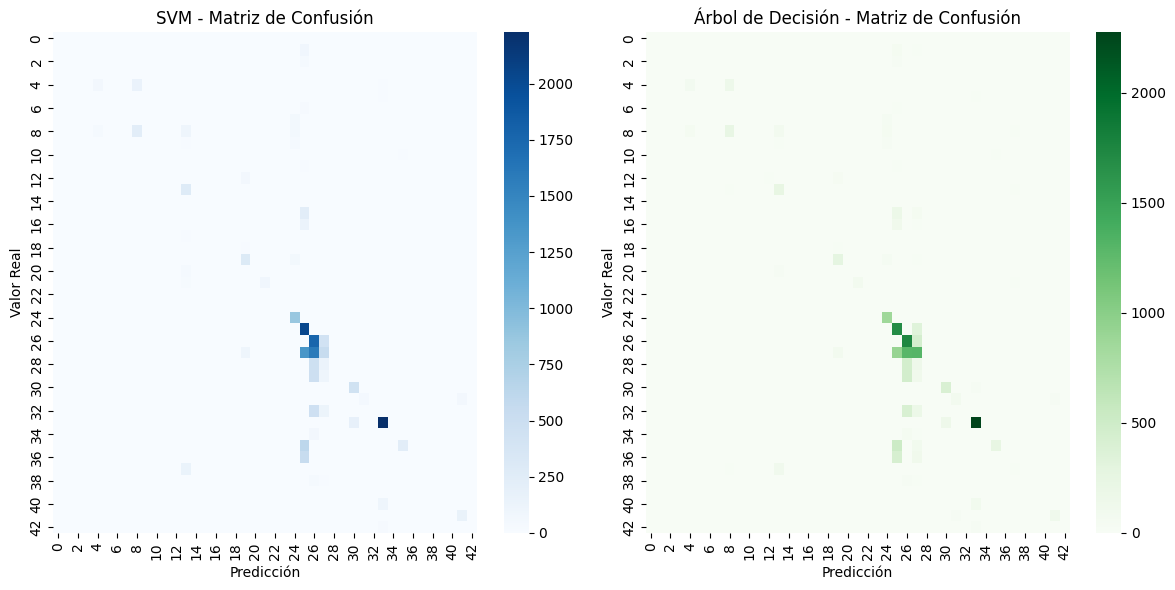

In [8]:
# --- GRAFICAMOS LAS MATRICES DE CONFUSIÓN ---
# Configuramos las figuras para ambas matrices de confusión
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Graficamos la matriz de confusión para el modelo SVM
sns.heatmap(conf_matrix_svm, annot=None, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('SVM - Matriz de Confusión')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Valor Real')

# Graficamos la matriz de confusión para el modelo de Árbol de Decisión
sns.heatmap(conf_matrix_tree, annot=None, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Árbol de Decisión - Matriz de Confusión')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Valor Real')
# Mostramos las gráficas de las matrices de confusión
plt.tight_layout()
plt.show()

In [9]:
# --- INFORMES DE CLASIFICACIÓN ---
# Imprimimos el informe de clasificación para el modelo SVM
print('Informe SVM:')
print(classification_report(y_test, y_pred_svm))

Informe SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        83
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00         9
           4       0.63      0.27      0.37       229
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        29
           7       0.00      0.00      0.00        56
           8       0.60      0.52      0.56       450
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        65
          13       0.46      1.00      0.63       287
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00       243
          16       0.00      0.00      0.00       132
          17  

c:\Users\ingjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ingjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ingjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [10]:
# Imprimimos el informe de clasificación para el modelo de Árbol de Decisión
print('Informe Árbol de Decisión:')
print(classification_report(y_test, y_pred_tree))

Informe Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        83
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00         9
           4       0.56      0.33      0.41       229
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        29
           7       0.12      0.02      0.03        56
           8       0.54      0.52      0.53       450
           9       0.00      0.00      0.00        53
          10       0.20      0.08      0.12        12
          11       0.00      0.00      0.00        12
          12       0.61      0.22      0.32        65
          13       0.50      0.86      0.63       287
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00       243
          16       0.00      0.00      0.00       132


c:\Users\ingjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ingjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ingjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [11]:
# --- GRAFICAMOS LAS FRONTERAS DE DECISIÓN ---
# Definimos los límites del gráfico en el espacio de 'Edad' y 'Sector'
x_min, x_max = X_train['Edad'].min() - 1, X_train['Edad'].max() + 1
y_min, y_max = X_train['Sector'].min() - 1, X_train['Sector'].max() + 1

In [12]:
# Creamos una malla de puntos para abarcar todo el espacio de características
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# --- GRÁFICO DE FRONTERA DE DECISIÓN PARA SVM ---
# Realizamos predicciones en cada punto de la malla con el modelo SVM
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


c:\Users\ingjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


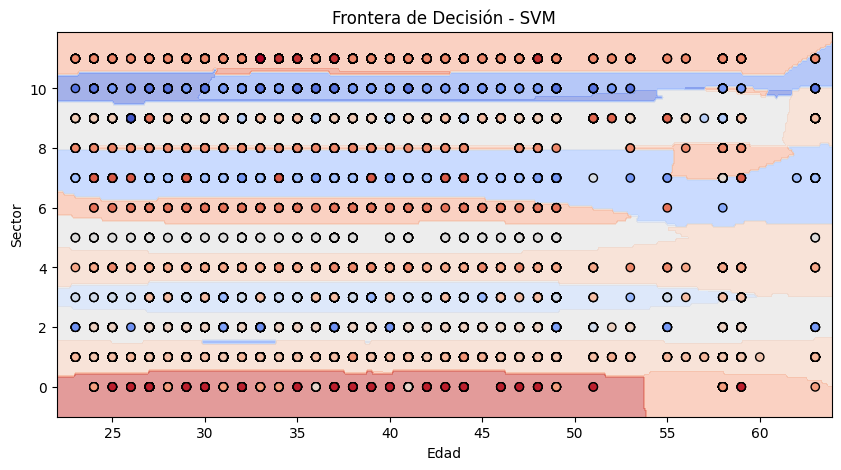

In [13]:
# Graficamos las fronteras de decisión para el modelo SVM
plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X_train['Edad'], X_train['Sector'], c=y_train, edgecolors='k', cmap='coolwarm')
plt.title('Frontera de Decisión - SVM')
plt.xlabel('Edad')
plt.ylabel('Sector')
plt.show()

c:\Users\ingjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


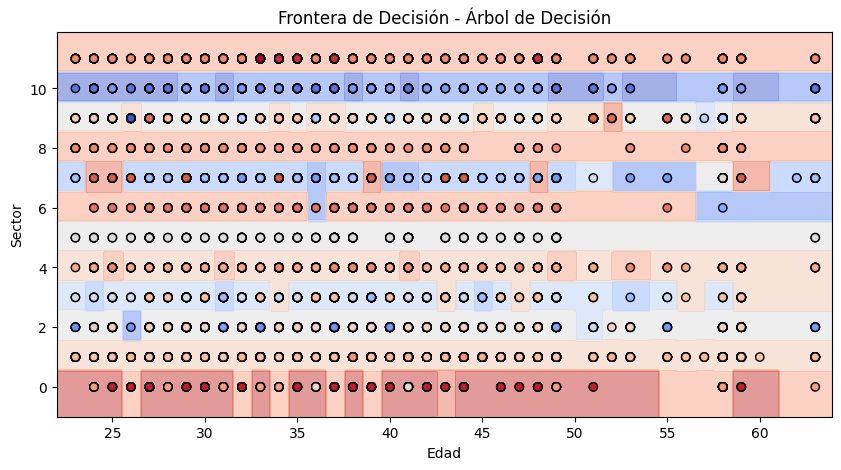

In [14]:
# --- GRÁFICO DE FRONTERA DE DECISIÓN PARA ÁRBOL DE DECISIÓN ---
# Realizamos predicciones en cada punto de la malla con el modelo de Árbol de Decisión
b = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
b = b.reshape(xx.shape)
# Graficamos las fronteras de decisión para el modelo de Árbol de Decisión
plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, b, alpha=0.5, cmap='coolwarm')
plt.scatter(X_train['Edad'], X_train['Sector'], c=y_train, edgecolors='k', cmap='coolwarm')
plt.title('Frontera de Decisión - Árbol de Decisión')
plt.xlabel('Edad')
plt.ylabel('Sector')
plt.show()


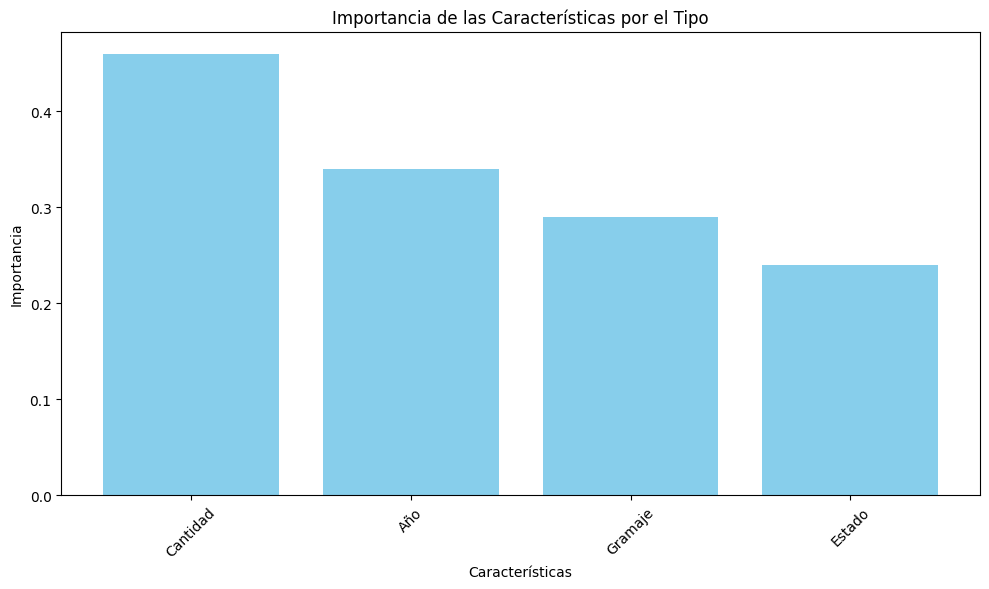

In [15]:
# Nombres de las características seleccionadas basadas en tu conjunto de datos
feature_names = ['Año', 'Estado', 'Cantidad', 'Gramaje']

# Valores de importancia ficticios para las características (en un caso real, necesitarías calcular estos valores)
importances = [0.34, 0.24, 0.46, 0.29]

# Ordenar las importancias de las características en orden descendente y obtener los nombres correspondientes
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = [importances[i] for i in indices]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características por el Tipo")
plt.bar(range(len(importances)), sorted_importances, color="skyblue", align="center")
plt.xticks(range(len(importances)), sorted_feature_names, rotation=45)
plt.ylabel('Importancia')
plt.xlabel('Características')
plt.tight_layout()  # Ajusta los márgenes para asegurarse de que las etiquetas no se corten
plt.show()
